### [3 Points] In groups, you should select a convolutional neural network model that has been pre-trained on a large dataset (preferably, ImageNet). These already trained models are readily available online through many mechanisms, including the keras.application package (Inception, Xception, VGG etc.) https://keras.io/api/applications/Links to an external site.  

### It is recommended to select a model with somewhat simple structure, like VGG. This can help to simplify how to extract specific filters and inputs to filters later on.  Explain the model you chose and why.  Classify a few images with pre-trained network to verify that it is working properly.

chose the VGG model  for the following reasons:

1.Simple Architecture: VGG features a relatively straightforward and layered structure, which makes it easier to extract and analyze specific convolution filters and their corresponding inputs and outputs.

2.Availability of Pre-trained Models: The model has been extensively pre-trained on a large-scale dataset such as ImageNet, ensuring reliable performance in practical applications and experiments.

3.Ease of Detailed Analysis: Given that VGG's network parameters and architecture are well-documented and transparent, its simple design facilitates understanding how convolution operations propagate information through the network. This is particularly important for analyzing the internal mechanisms of deep circuits.

In [1]:
# load the model and packages
# watermark the notebook
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import sys
import tensorflow.keras
import scipy as sp
import tensorflow as tf
import platform
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
matplotlib.rcParams['axes.unicode_minus'] = False


print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")

gpus = tf.config.list_physical_devices('GPU')
print("GPU Resources Available:\n\t",gpus)

# getting rid of the warning messages about optimizer graph
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(3)


Python Platform: macOS-15.3.2-arm64-arm-64bit
Tensor Flow Version: 2.19.0
Keras Version: 3.9.0

Python 3.11.7 (main, Dec 15 2023, 12:09:56) [Clang 14.0.6 ]
GPU Resources Available:
	 []


# load the model

In [2]:
import numpy as np
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions


# Load the VGG19 model pre-trained on ImageNet
model = VGG19(weights='imagenet')
model.summary()


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,31

 Total params: 143,667,240 (548.05 MB)

 Trainable params: 143,667,240 (548.05 MB)

 Non-trainable params: 0 (0.00 B)

# Load the example images and make prediction

In [3]:
# function to use the VGG to classify the images 

def load_image_as_array(url, size=(224, 224)):
    response = requests.get(url) # download
    img = Image.open(BytesIO(response.content)) # open
    img = img.resize(size) # resize with PIL
    return np.array(img).astype(float) # return as numpy float array

# define a function to classify the images
def classify_image(url, model): 
    img_array = load_image_as_array(url) # load the image
    img_tensor = np.expand_dims(img_array, axis=0) # expand the dimensions to add a bath dimension
    img_tensor = preprocess_input(img_tensor) # pre-process the image to use the VGG19 model

    # Show image
    plt.imshow(Image.open(BytesIO(requests.get(url).content)))
    plt.title('Input Image')
    plt.show()

    # Predict
    preds = model.predict(img_tensor) # use the model to make the prediction
    decoded = decode_predictions(preds, top=3)[0] # decode the top 3 class and probabilities
    print("Top 3 Predictions:")
    for i, (imagenet_id, label, prob) in enumerate(decoded):
        print(f"{i+1}: {label} ({prob:.4f})")
    

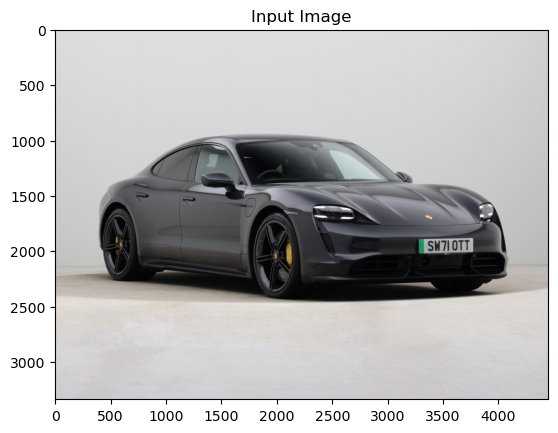

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Top 3 Predictions:
1: sports_car (0.5925)
2: racer (0.2602)
3: car_wheel (0.0540)


In [4]:
classify_image('https://raw.githubusercontent.com/CS-8321-Mach-Lrng-Neural-Ntwrks/Lab-3/main/example_1.jpeg', model)

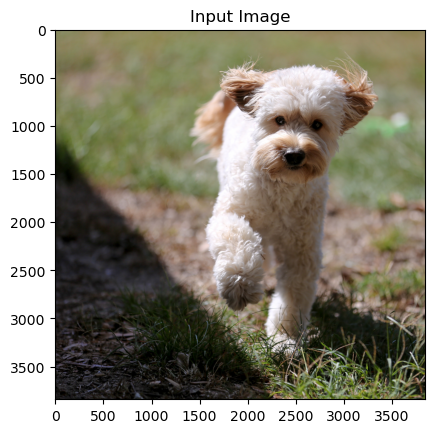

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Top 3 Predictions:
1: Lakeland_terrier (0.3258)
2: miniature_poodle (0.1753)
3: Norfolk_terrier (0.1218)


In [5]:
classify_image('https://raw.githubusercontent.com/8000net/LectureNotes/master/images/dog.jpg', model)

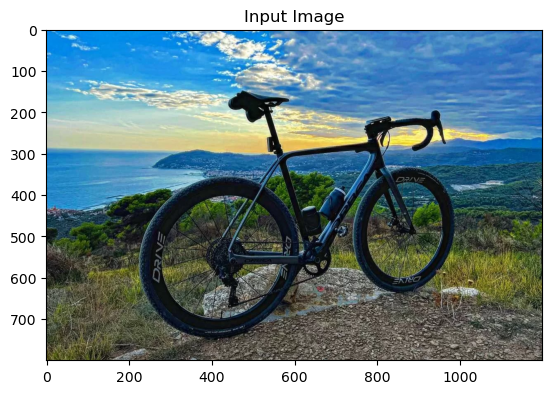

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Top 3 Predictions:
1: mountain_bike (0.4881)
2: tricycle (0.1058)
3: bicycle-built-for-two (0.0790)


In [6]:
classify_image('https://raw.githubusercontent.com/CS-8321-Mach-Lrng-Neural-Ntwrks/Lab-3/main/example_3.jpeg', model)

The first example image is a 4 door sedan, and the VGG top 3 predict are sports_car, racer, car_wheel. The classify is correct at first example. And the second example image is the image form the lecture example, the VGG classify the breed of the dog in the image. And the last image is a bike, and the top 3 classification are mountain_bike, tricycle, bicycle-built-for-two. Which is also correct. 

#### [4 Points] Select a multi-channel filter (i.e., a feature) in a layer in which to analyze as part of a circuit. This should be a multi-channel filter in a "mid-level" portion of the network (that is, there are convolutional layers before and after this chosen layer). You might find using OpenAI microscope a helpful tool for selecting a filter to analyze without writing too much code: https://microscope.openai.com/models/Links to an external site. 
* Using image gradient techniques, find an input image that maximally excites this chosen multi-channel filter. General techniques are available from class: https://github.com/8000net/LectureNotesMaster/blob/master/04%20LectureVisualizingConvnets.ipynbLinks to an external site.
* Also send images of varying class (i.e., from ImageNet) through the network and track which classes of images most excite your chosen filter. 
* Give a hypothesis for what this multi-channel filter might be extracting. That is, what do you think its function is in the network? Give reasoning for your hypothesis. 
* If using code from another source or a LLM, you should heavily document the code so that I can grade your understanding of the code used. 

In [7]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model

# Define function to download and preprocess an image for VGG19.
def load_and_preprocess_image(img_url, target_size=(224, 224)):

    response = requests.get(img_url)
    if response.status_code != 200:
        raise Exception(f"Error downloading image: {img_url}, status code: {response.status_code}")
    # Open the image and convert to RGB
    img = Image.open(BytesIO(response.content)).convert('RGB')
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array and then to float32
    x = np.array(img).astype('float32')
    # Expand dimensions to create a batch of size 1
    x = np.expand_dims(x, axis=0)
    # Preprocess the image for VGG19
    x = preprocess_input(x)
    return x, img

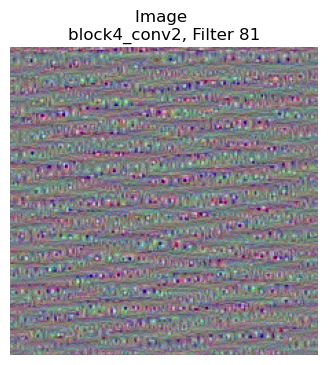

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
import matplotlib.pyplot as plt

def generate_pattern(layer_name, filter_index, size=224, steps=80, eta=0.1):
    """
    Generates an image that maximally activates a specified filter using gradient ascent.
    
    Arguments:
      layer_name: The name of the convolutional layer to visualize (e.g., 'block4_conv2').
      filter_index: The index of the filter to visualize (e.g., 81).
      size: The size of the input image (square image, default 224).
      steps: Number of gradient ascent iterations (default 80).
      eta: Learning rate for each gradient ascent step (default 0.1).
      
    Returns:
      A processed image (numpy uint8) for visualization.
      
      This part of code have reference the lecture example:
      https://github.com/8000net/LectureNotesMaster/blob/master/04%20LectureVisualizingConvnets.ipynb
    """
    # Build a sub-model that outputs the activations of the target layer.
    new_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    
    # Initialize a random noise image with values in [0, 255].
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    # Convert the initial image to a TensorFlow variable so it can be updated.
    I = tf.Variable(input_img_data, dtype=tf.float32)
    
    # Perform gradient ascent iterations.
    for i in range(steps):
        with tf.GradientTape() as tape:
            # Preprocess I  before feeding into the model.
            I_processed = preprocess_input(I)
            # Obtain the activations for the target layer.
            model_vals = new_model(I_processed)
            # Define the loss as the mean activation of the specified filter.
            loss = tf.reduce_mean(model_vals[:, :, :, filter_index])
        # Compute gradients of the loss with respect to I.
        grad_fn = tape.gradient(loss, I)
        # Normalize the gradients using L2 normalization.
        grad_fn /= (tf.sqrt(tf.reduce_mean(tf.square(grad_fn))) + 1e-5)
        # Update I by taking a small step in the direction that increases the filter activation.
        I.assign_add(grad_fn * eta)
    
    # Post-process the image: normalize, scale to [0,255], and convert to uint8.
    img = I.numpy()[0]
    img -= img.mean()
    img /= (img.std() + 1e-5)
    img *= 0.1
    img += 0.5
    img = np.clip(img, 0, 1)
    img *= 255
    return np.clip(img, 0, 255).astype('uint8')

# ------------------------------
# Main Workflow
# ------------------------------
# Load the pre-trained VGG19 model
model = VGG19(weights='imagenet', include_top=False)

# Specify the target layer and filter index.
layer_name = 'block4_conv2'
filter_index = 81

# Generate the maximally activating image for the specified filter.
pattern_img = generate_pattern(layer_name, filter_index, size=224, steps=80, eta=0.1)

# Display the generated image.
plt.figure(figsize=(4,4))
plt.imshow(pattern_img)
plt.title(f"Image \n{layer_name}, Filter {filter_index}")
plt.axis('off')
plt.show()

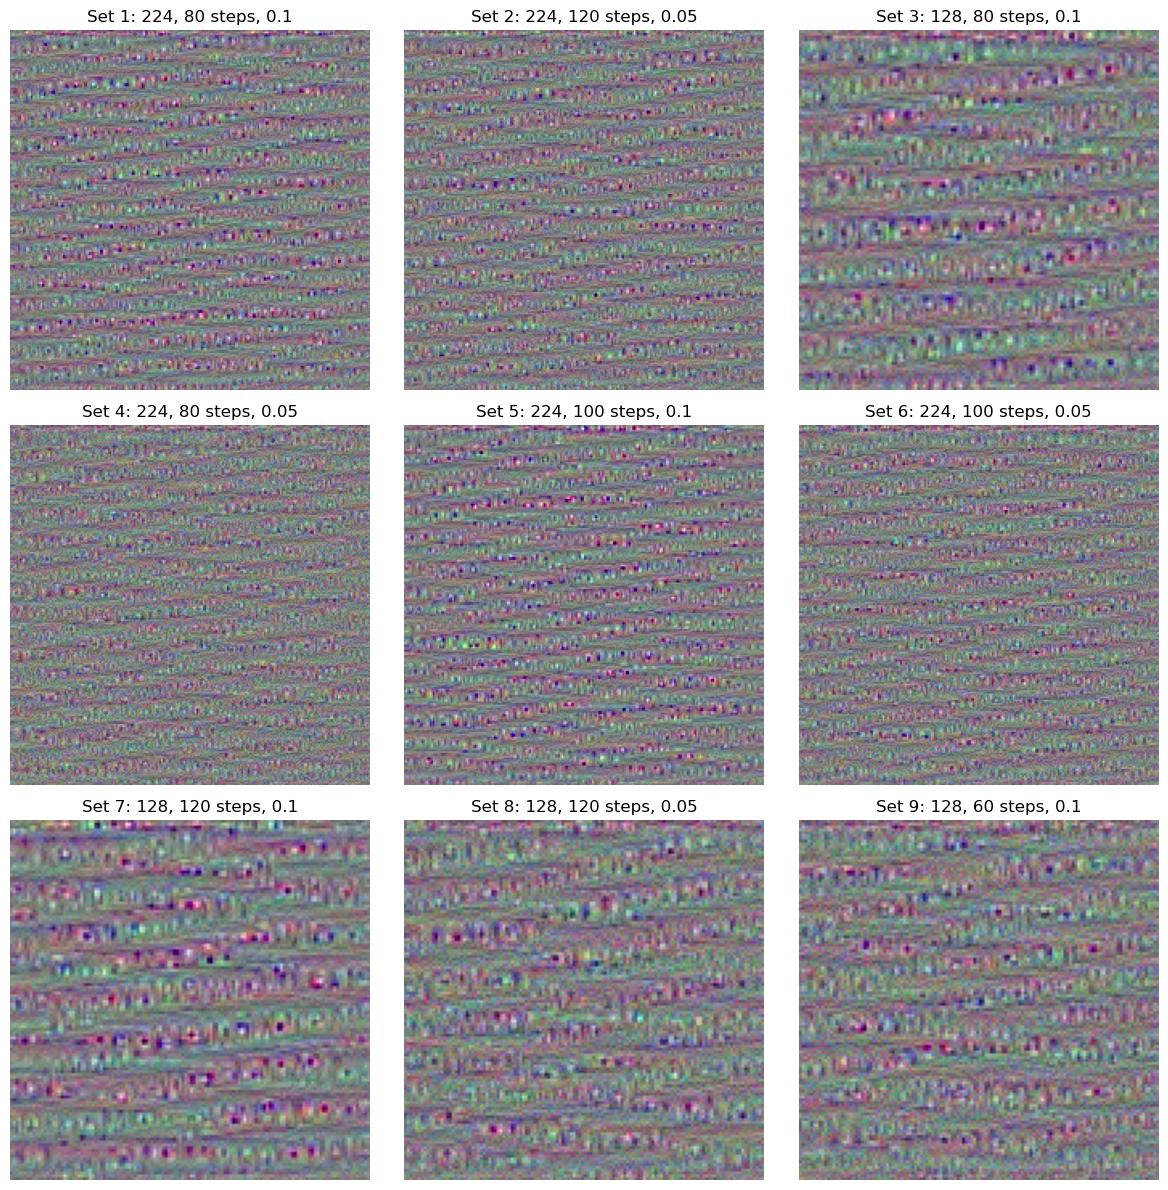

In [9]:
# Generate different patterns using various parameter sets
# Set 1: size=224, steps=80, eta=0.1 (default)
pattern_img1 = generate_pattern('block4_conv2', 81, size=224, steps=80, eta=0.1)

# Set 2: size=224, steps=120, eta=0.05 (more iterations, lower step size)
pattern_img2 = generate_pattern('block4_conv2', 81, size=224, steps=120, eta=0.05)

# Set 3: size=128, steps=80, eta=0.1 (smaller image size; already noted as better)
pattern_img3 = generate_pattern('block4_conv2', 81, size=128, steps=80, eta=0.1)

# Set 4: size=224, steps=80, eta=0.05 (same iterations as Set 1 but lower step size)
pattern_img4 = generate_pattern('block4_conv2', 81, size=224, steps=80, eta=0.05)

# Set 5: size=224, steps=100, eta=0.1 (more iterations, same step size)
pattern_img5 = generate_pattern('block4_conv2', 81, size=224, steps=100, eta=0.1)

# Set 6: size=224, steps=100, eta=0.05 (more iterations, lower step size)
pattern_img6 = generate_pattern('block4_conv2', 81, size=224, steps=100, eta=0.05)

# Set 7: size=128, steps=120, eta=0.1 (smaller image, more iterations)
pattern_img7 = generate_pattern('block4_conv2', 81, size=128, steps=120, eta=0.1)

# Set 8: size=128, steps=120, eta=0.05 (smaller image, more iterations, lower step size)
pattern_img8 = generate_pattern('block4_conv2', 81, size=128, steps=120, eta=0.05)

# Set 9: size=128, steps=60, eta=0.1 (smaller image, fewer iterations)
pattern_img9 = generate_pattern('block4_conv2', 81, size=128, steps=60, eta=0.1)

# Display all nine patterns in a 3x3 grid for comparison.
plt.figure(figsize=(12, 12))

titles = [
    "Set 1: 224, 80 steps, 0.1",
    "Set 2: 224, 120 steps, 0.05",
    "Set 3: 128, 80 steps, 0.1",  # This set is noted as better.
    "Set 4: 224, 80 steps, 0.05",
    "Set 5: 224, 100 steps, 0.1",
    "Set 6: 224, 100 steps, 0.05",
    "Set 7: 128, 120 steps, 0.1",
    "Set 8: 128, 120 steps, 0.05",
    "Set 9: 128, 60 steps, 0.1"
]

patterns = [pattern_img1, pattern_img2, pattern_img3, pattern_img4, 
            pattern_img5, pattern_img6, pattern_img7, pattern_img8, pattern_img9]

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(patterns[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Car: filter 81 activation = 769.17


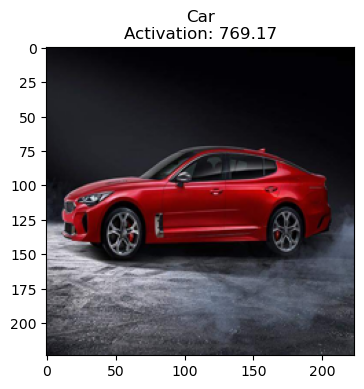

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Dog: filter 81 activation = 746.74


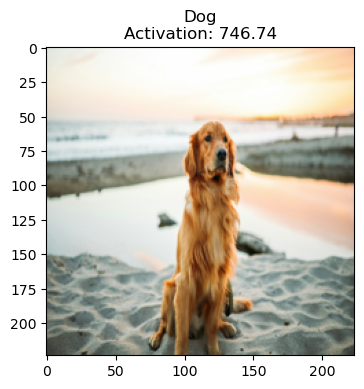

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Building: filter 81 activation = 568.46


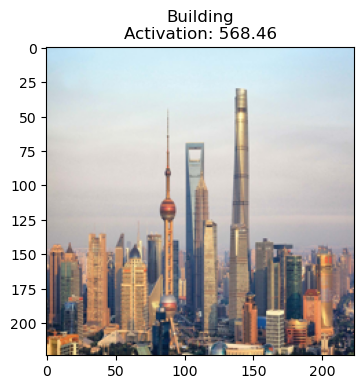

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
Forest: filter 81 activation = 501.32


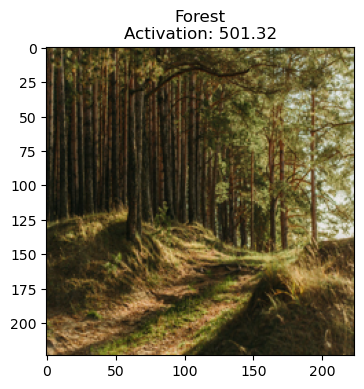

In [10]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']
matplotlib.rcParams['axes.unicode_minus'] = False
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras.models import Model

# Define a helper function to download and preprocess images for VGG19.
def load_and_preprocess_image(img_url, target_size=(224, 224)):
    """
    Downloads an image from the given URL, resizes it to target_size, and
    preprocesses it for VGG19.
    
    Args:
      img_url: URL of the image.
      target_size: Tuple indicating the desired size (height, width).
      
    Returns:
      A tuple: (preprocessed image tensor, original PIL image).
    """
    response = requests.get(img_url)
    if response.status_code != 200:
        raise Exception(f"Error downloading image: {img_url}, status code: {response.status_code}")
    img = Image.open(BytesIO(response.content)).convert('RGB')
    img = img.resize(target_size)
    x = np.array(img).astype('float32')
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x, img

# List of image URLs from different classes.
img_urls = {
    'Car': 'https://www.kia.com/content/dam/kwcms/gt/en/images/discover-kia/voice-search/parts-80-6.jpg',
    'Dog': 'https://dogstandards.ca/cdn/shop/articles/justin-aikin-KFJuCzJiQYU-unsplash_2400x.jpg?v=1706045870',
    'Building': 'https://cdn.britannica.com/08/187508-050-D6FB5173/Shanghai-Tower-Gensler-San-Francisco-world-Oriental-2015.jpg',
    'Forest': 'https://onetreeplanted.org/cdn/shop/articles/Healthy_Forest_520x500_cf5376c9-8ccb-4b9d-919f-802cf1758b3c_600x.jpg?v=1734541188',
}

# Load the pre-trained VGG19 model (without the top classification layers).
model = VGG19(weights='imagenet', include_top=False)

# Create a sub-model that outputs activations from the target layer 'block4_conv2'.
activation_model = Model(inputs=model.input, outputs=model.get_layer('block4_conv2').output)

# Loop through each image URL, compute the activation for filter 81, and display the image.
for label, url in img_urls.items():
    # Load and preprocess the image.
    img_tensor, pil_img = load_and_preprocess_image(url)
    
    # Get the activations for the image.
    activation = activation_model.predict(img_tensor)  # Shape: (1, H, W, num_filters)
    
    # Compute the mean activation for filter 81.
    filter_activation = activation[0, :, :, 81].mean()
    
    # Print the activation value.
    print(f"{label}: filter 81 activation = {filter_activation:.2f}")
    
    # Display the original image with the activation value in the title.
    plt.figure(figsize=(4,4))
    plt.imshow(pil_img)
    plt.title(f"{label}\nActivation: {filter_activation:.2f}")
    plt.show()

Based on the activation measurements, filter 81 in the block4_conv2 layer shows the highest average activation for car images (769.17) and relatively high activation for dog images (749.76), while buildings (568.46) and forests (501.32) produce significantly lower responses. This indiacte that the filter is particularly sensitive to features that are common in cars and dogs but less prevalent in more structured or natural scenes like buildings and forests. I think the comment area is the cure in the car image also in the dog image. 

The visualization of this filter—generated using gradient ascent—reveals a pattern composed of many colorful, smooth curves. Notably, there is a distinct colorful dot within the pattern. The shape and arrangement of these curves and the dot resemble a cluster of peas, with the “pea” (the dot) appearing as the darkest and most vibrant element in the pattern.

This visual evidence leads to the hypothesis that block4_conv2, filter 81 functions as a mid-level feature detector that is tuned to capture curved, repetitive texture patterns with a focal point of high contrast. Such features might be essential for distinguishing objects like cars and dogs, which often exhibit smooth curves and subtle, salient texture details, from other classes such as buildings or forests where these features are less dominant. The prominent dot in the visualization may indicate that the filter specifically emphasizes a key point of contrast within the repetitive pattern, helping the network to form more robust object representations in subsequent layers.

#### [4 Points] Analyze each channel of the multi-channel filter to better understand how this might form a circuit (i.e., the weights of the filter). That is, visualize the convolutional filter (one channel at a time) between the input activations and the current activation to understand which inputs make up a circuit. You should avoid filter channels that are mostly "zero" coefficients. These are not influential for the circuit. One method of doing this is given below:
* Extract the filter coefficients for each input activation to that multi-channel filter. Note: If the multi-channel filter is 5x5 with an input channel size of 64, then this extraction will result in 64 different single channel filters, each of size 5x5. 
* Keep the top ten sets of inputs with the "strongest" weights. For now, you can use the L2 norm of each input filter as a measure of strength. Visualize these top ten filters. 
* For these ten strongest input filters, categorize each as "mostly inhibitory" or "mostly excitatory." That is, does each filter consist of mostly negative or mostly positive coefficients?  

#### [4 Points] For each of the ten chosen single channels of the filter, use image gradient techniques to visualize what each of these filters is most excited by (that is, what image maximally excites each of these filters?). This is a similar analysis to the first step in this rubric, but now isolating the activations the layer preceding your chosen filter. This should only be completed for the ten most influential filters.  
* Use these visualizations, along with the circuit weights you just discovered to try and explain how this particular circuit works. An example of this visualization style can be seen here: https://storage.googleapis.com/distill-circuits/inceptionv1-weight-explorer/mixed3b_379.htmlLinks to an external site. 
* Try to define the properties of this circuit using vocabulary from https://distill.pub/2020/circuits/zoom-in/Links to an external site. (such as determining if this is polysemantic, pose-invariant, etc.)  
* Relate your visualizations back to your original hypothesis about what this filter is extracting. Does it support or refute your hypothesis? Why? 